In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("./merge_train.csv",parse_dates=["date"])

In [15]:
# 提取小时
df['Hour'] = df['date'].dt.hour

# 定义每2小时一个区间的 bins 和 labels
bins = range(0, 25, 2)  # [0, 2, 4, ..., 24]
labels = [f"{i}~{i+2}" for i in bins[:-1]]

# 创建时间区间列
df['TimeInterval'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# 计算四分位数
quartiles = df.groupby('TimeInterval')['Price'].quantile([0.25, 0.5, 0.75]).unstack()

# 重命名列名
quartiles.columns = ['25%', '50%', '75%']

df['LogPrice'] = np.log(df['Price'] + 1)

print(quartiles)


                   25%      50%       75%
TimeInterval                             
0~2            60.9200   76.555   94.7500
2~4            57.6400   65.460   85.7500
4~6            60.8375   79.105   97.2925
6~8            33.8325   64.125  123.5650
8~10          -20.5000   18.840   50.3000
10~12         -37.3500  -10.000   38.7500
12~14         -35.1000    0.000   48.5500
14~16           0.0000   41.405   62.7300
16~18          65.0275  115.750  203.7575
18~20         111.5275  145.200  245.5950
20~22          78.7500  103.950  139.2225
22~24          69.7800   93.750  121.8400


c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Owner\AppData\Local\Temp\ipykernel_21140\1268418318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


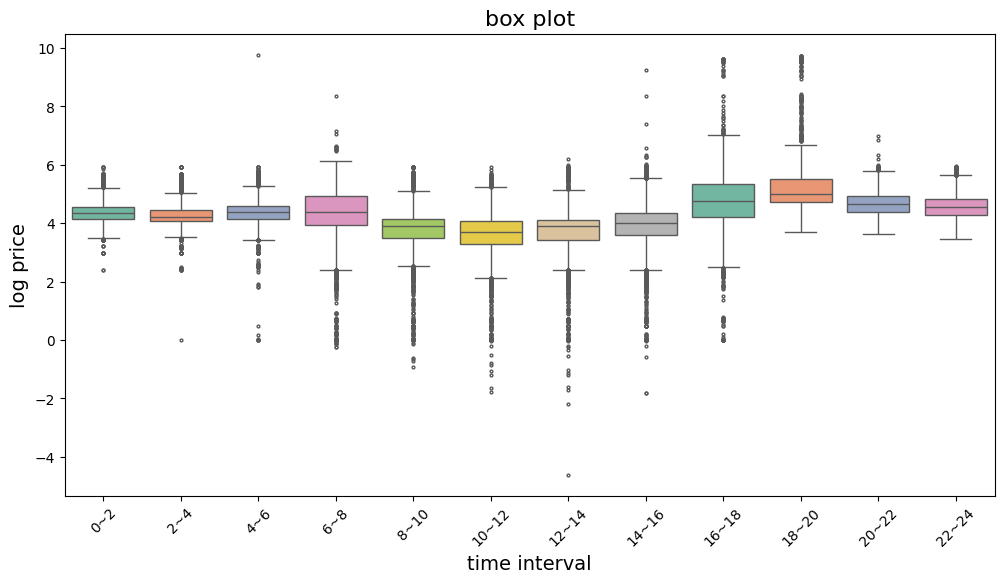

In [16]:

plt.figure(figsize=(12,6))
sns.boxplot(
    x='TimeInterval', 
    y='LogPrice', 
    data=df, 
    order=labels, 
    palette="Set2", 
    fliersize=2
)
plt.title('box plot', fontsize=16)
plt.xlabel('time interval', fontsize=14)
plt.ylabel('log price', fontsize=14)
plt.xticks(rotation=45)
plt.show()



C:\Users\Owner\AppData\Local\Temp\ipykernel_21140\973724506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


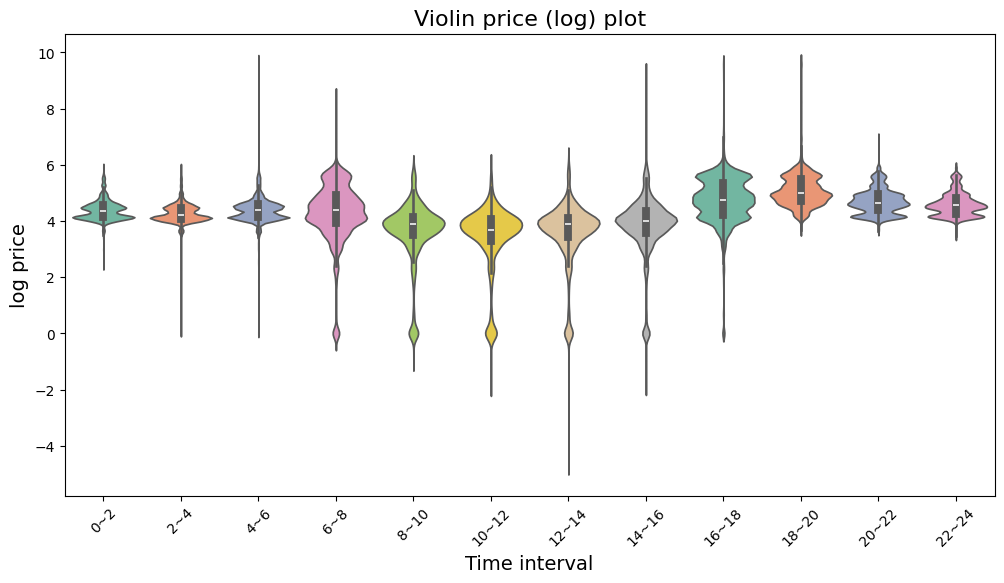

In [26]:
plt.figure(figsize=(12,6))
sns.violinplot(
    x='TimeInterval', 
    y='LogPrice', 
    data=df, 
    order=labels, 
    palette="Set2"
)
plt.title('Violin price (log) plot', fontsize=16)
plt.xlabel('Time interval', fontsize=14)
plt.ylabel('log price', fontsize=14)
plt.xticks(rotation=45)
plt.show()



In [18]:
df.columns

Index(['date', 'Demand', 'Price', 'Region', 'Forecast_Demand_0.5 hour future',
       'Forecast_Demand_1 hour future', 'Forecast_Demand_1.5 hours future',
       'Forecast_Demand_2 hours future', 'Forecast_Demand_2.5 hours future',
       'Forecast_Demand_3 hours future', 'Forecast_Demand_3.5 hours future',
       'Forecast_Demand_4 hours future', 'Forecast_Demand_4.5 hours future',
       'Forecast_Demand_5 hours future', 'Forecast_Demand_5.5 hours future',
       'Forecast_Demand_6 hours future', 'Forecast_Demand_6.5 hours future',
       'Forecast_Demand_7 hours future', 'Forecast_Demand_7.5 hours future',
       'Forecast_Demand_8 hours future', 'Forecast_Demand_8.5 hours future',
       'Forecast_Demand_9 hours future', 'Forecast_Demand_9.5 hours future',
       'Forecast_Roof_0.5 hour future', 'Forecast_Roof_1 hour future',
       'Forecast_Roof_1.5 hours future', 'Forecast_Roof_2 hours future',
       'Forecast_Roof_2.5 hours future', 'Forecast_Roof_3 hours future',
       'Fore

C:\Users\Owner\AppData\Local\Temp\ipykernel_21140\3985780218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


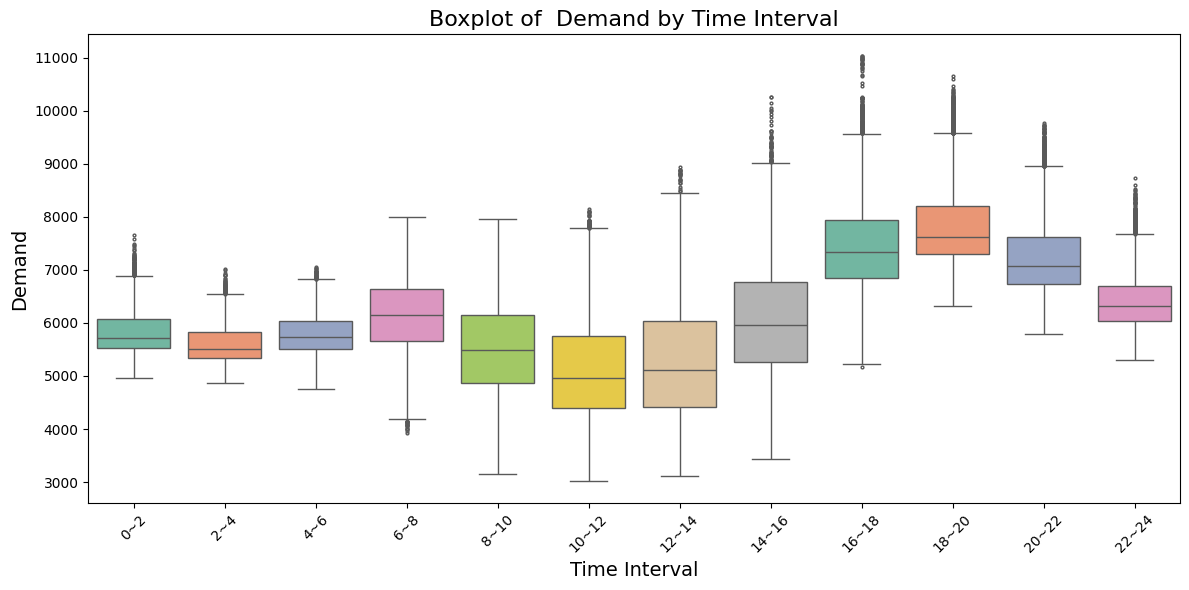

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(
    x='TimeInterval', 
    y='Demand', 
    data=df, 
    order=labels, 
    palette="Set2", 
    fliersize=2
)
plt.title('Boxplot of  Demand by Time Interval', fontsize=16)
plt.xlabel('Time Interval', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_21140\2321496229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


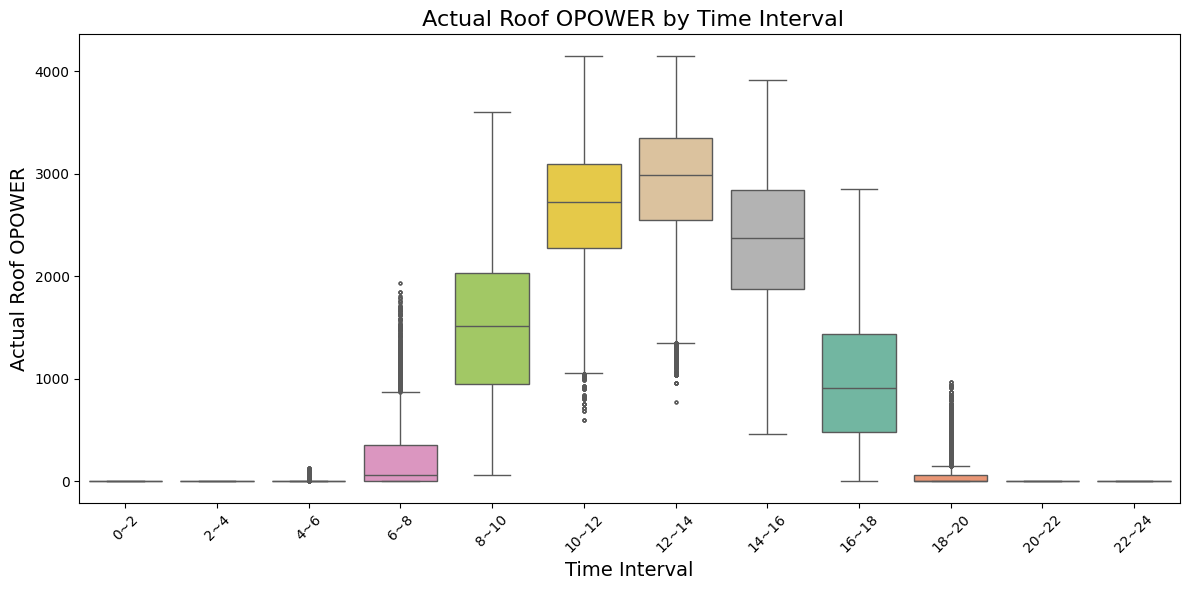

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(
    x='TimeInterval', 
    y='Adjusted_Actual_Roof_OPOWER', 
    data=df, 
    order=labels, 
    palette="Set2", 
    fliersize=2
)
plt.title(' Actual Roof OPOWER by Time Interval', fontsize=16)
plt.xlabel('Time Interval', fontsize=14)
plt.ylabel('Actual Roof OPOWER', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_21140\3738970614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


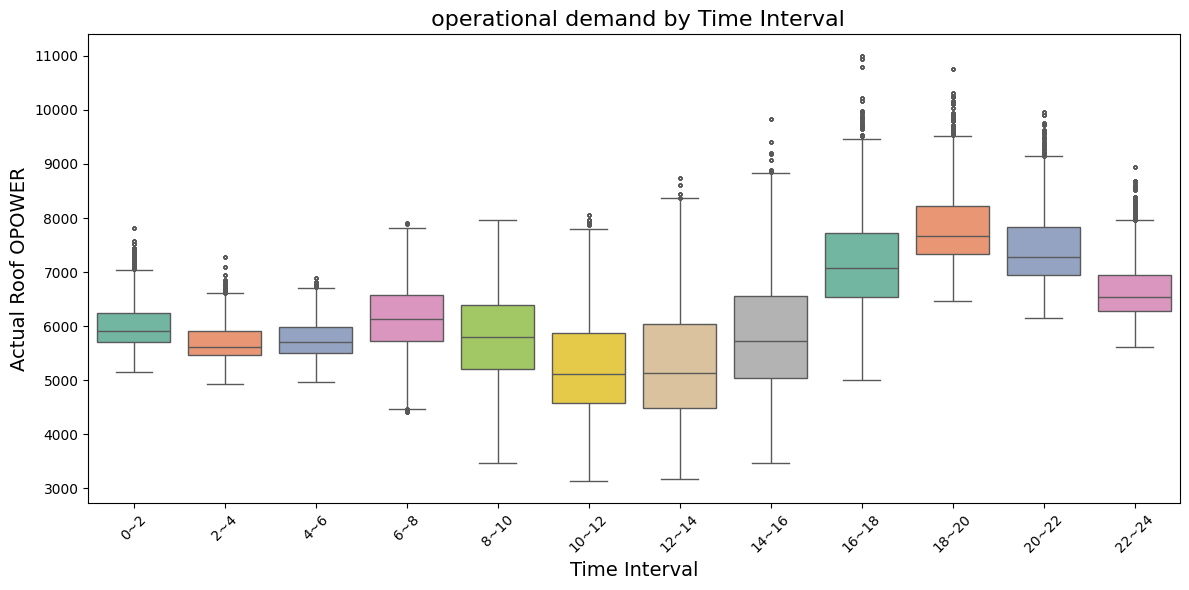

In [28]:

plt.figure(figsize=(12,6))
sns.boxplot(
    x='TimeInterval', 
    y='Actual_Demand_OPERATIONAL_DEMAND', 
    data=df, 
    order=labels, 
    palette="Set2", 
    fliersize=2
)
plt.title(' operational demand by Time Interval', fontsize=16)
plt.xlabel('Time Interval', fontsize=14)
plt.ylabel('Actual Roof OPOWER', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
